<a href="https://colab.research.google.com/github/njafarov/Optimization_LP/blob/main/Callenge5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

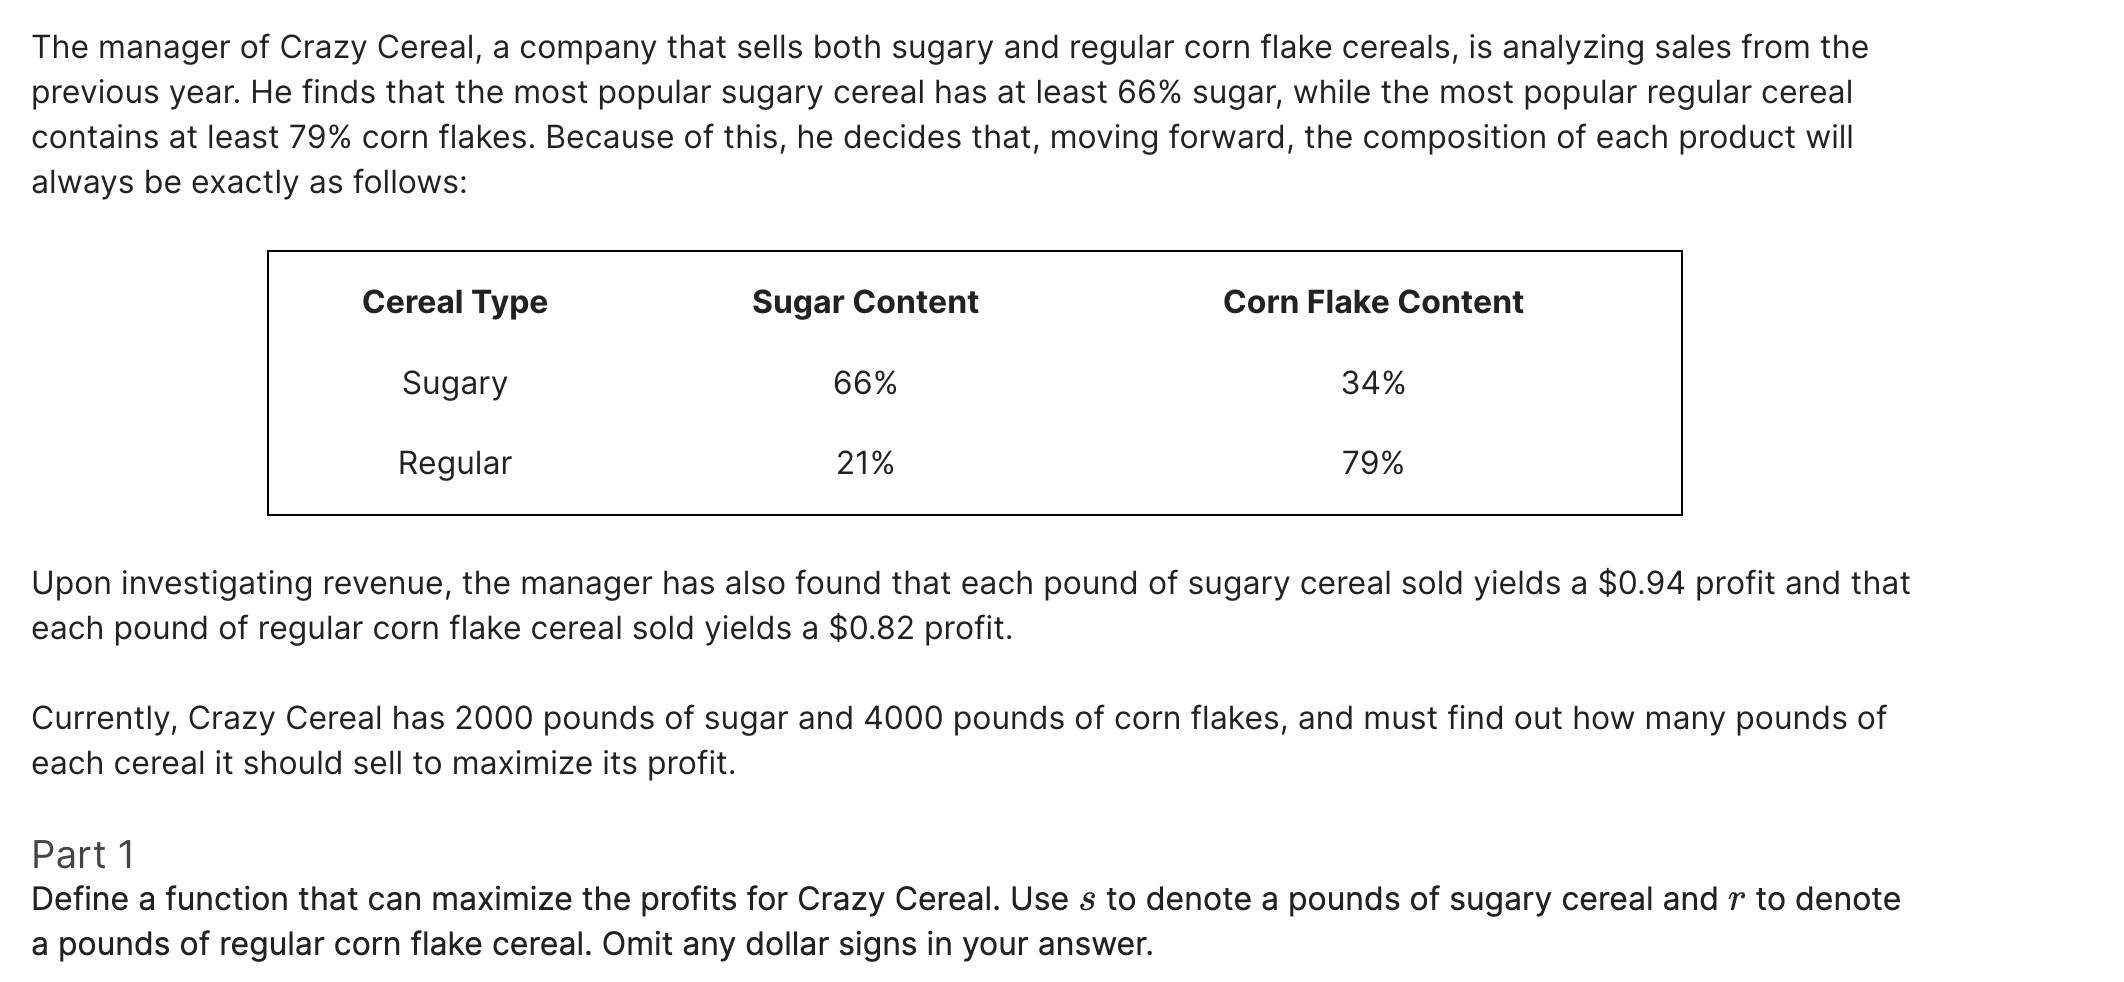

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 25.2 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123941 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
P

In [3]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [4]:
from pyomo.core.base import initializer
model = pyo.ConcreteModel()

model.i = pyo.Set(initialize = ['Sugarly', 'Regular'])

model.S = pyo.Param(model.i, initialize={'Sugarly':0.66, 'Regular':0.21})
S = model.S
model.C = pyo.Param(model.i, initialize={'Sugarly':0.34, 'Regular':0.79})
C = model.C

model.P = pyo.Param(model.i, initialize={'Sugarly':0.94, 'Regular':0.82})
P = model.P

model.x = pyo.Var(model.i, domain=pyo.NonNegativeReals)
x = model.x 
def objective_function(model,i):
  return sum(P[i]*x[i] for i in model.i) 
model.Obj = pyo.Objective(rule = objective_function, sense=pyo.maximize)

def cons1(model,i):
  return sum(S[i]*x[i] for i in model.i)<=2000
model.Cons1 = pyo.Constraint(rule=cons1)

def cons2(model,i):
  return sum(C[i]*x[i] for i in model.i)<=4000
model.Cons2 = pyo.Constraint(rule=cons2)


Solver = SolverFactory('glpk')
results = Solver.solve(model)

print(results)
print("Objective: ", model.Obj())

for i in model.i:
  print(i,"= ", x[i]())


Problem: 
- Name: unknown
  Lower bound: 5117.33333333333
  Upper bound: 5117.33333333333
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.02472662925720215
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective:  5117.333333333333
Sugarly =  1644.44444444444
Regular =  4355.55555555556
